In [73]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [74]:
## NOTE : Change first part following this:
# https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

# Linear regression on red wine dataset

## Import dataset

In [75]:
# import text documents from wikipedia abstracts
wine_data=pd.read_csv('winequality/winequality-red.csv',delimiter=';')

In [76]:
len(wine_data)

1599

In [77]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [78]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [86]:
wine_data.isnull().any()
# all the columns should give False, In case for any column you find True result, 
# then remove all the null values from that column using :
# wine_data = wine_data.fillna(method='ffill')

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

/Users/aponsero/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


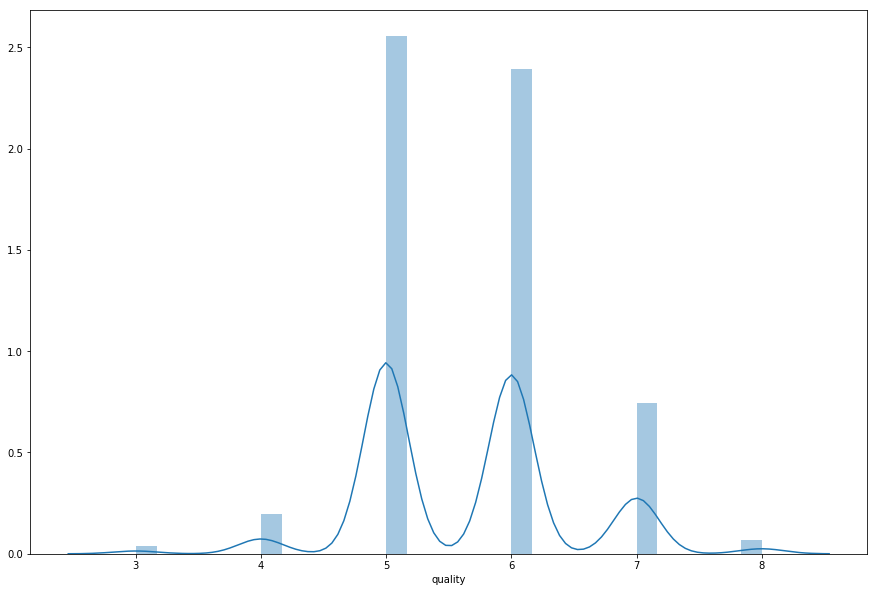

In [89]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(wine_data['quality'])

In [80]:
# shuffle the rows of the dataframe
wine_data = wine_data.sample(frac=1).reset_index(drop=True)

# define the data/predictors as the pre-set feature names  
df = wine_data.drop("quality", axis=1)

# Put the target (wine quality -- quality) in another DataFrame
target = pd.DataFrame(wine_data, columns=["quality"])

## Compute simple regression

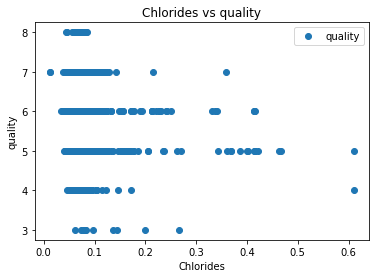

In [108]:
wine_data.plot(x='chlorides', y='quality', style='o')  
plt.title('Chlorides vs quality')  
plt.xlabel('Chlorides')  
plt.ylabel('quality')  
plt.show()

In [109]:
# compute a simple regression on a single input
X = df["chlorides"].values.reshape(-1,1)
y = target["quality"].values.reshape(-1,1)

# Split the data into training/testing sets
X_train = X[:-50]
X_test = X[-50:]

# Split the targets into training/testing sets
Y_train = y[:-50]
Y_test = y[-50:]

In [110]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

# Make predictions using the testing set
Y_pred = regr.predict(X_test)

Coefficients: 
 [[-2.34536539]]
Intercept: 
 [5.8389223]
Mean squared error: 0.46
Coefficient of determination: -0.01


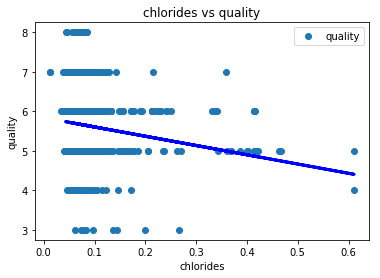

In [112]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The intercept
#To retrieve the intercept:
print('Intercept: \n', regr.intercept_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, Y_pred))

# Plot outputs
wine_data.plot(x='chlorides', y='quality', style='o')  
plt.plot(X_test, Y_pred, color='blue', linewidth=3)

plt.title('chlorides vs quality')  
plt.xlabel('chlorides')  
plt.ylabel('quality')  

plt.show()

In [113]:
# make predictions
pred_df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_pred.flatten()})
pred_df.head()

,Actual,Predicted
0,5,5.648948
1,6,5.637221
2,6,5.672401
3,5,5.648948
4,6,5.641912


# Multiple regression

In [121]:
# compute a multiple regression 
X = df.values
y = target["quality"].values
columns_name = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 
             'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']

# Split the data into training/testing sets
X_train = X[:-50]
X_test = X[-50:]

# Split the targets into training/testing sets
Y_train = y[:-50]
Y_test = y[-50:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

# Make predictions using the testing set
Y_pred = regr.predict(X_test)
df_pred = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df1 = df_pred.head(25)

# The coefficients
coeff_df = pd.DataFrame(regr.coef_, columns_name)  
print(coeff_df)


                              0
fixed acidity          0.023282
volatile acidity      -1.091048
citric acid           -0.163823
residual sugar         0.023968
chlorides             -1.959321
free sulfur dioxide    0.004096
total sulfur dioxide  -0.003374
density              -19.839236
pH                    -0.432127
sulphates              0.932644
alcohol                0.275049


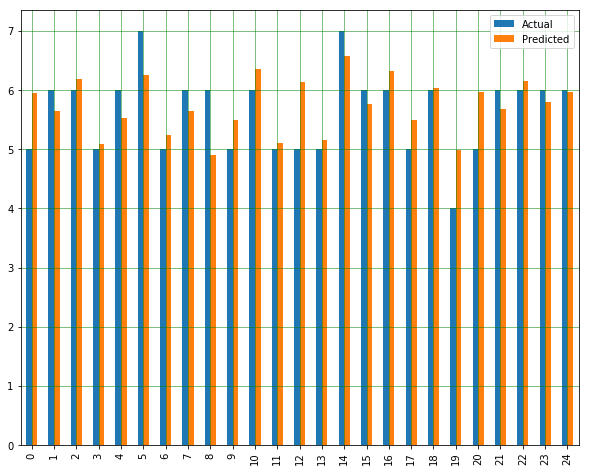

In [122]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [123]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 0.4478937228249658
Mean Squared Error: 0.4251615621631202
Root Mean Squared Error: 0.6520441412689176
